GEL521 - Machine Learning - 202420   
Final_Project:      Cats_and_Dogs

Presented to:   
Dr. Hayssam Serhan

Presented by:   
Antonio Haddad (202200238)   
Elias-Charbel Salameh (202201047)

Convolutional Network:

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from tensorflow.keras.models import Sequential,load_model # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # type: ignore
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler # type: ignore

def display_images_with_labels(generator, model, num_images, rows, columns):
        # Get the class labels
        class_labels = list(generator.class_indices.keys())

        # Get a batch of images and their true labels from the generator
        images, true_labels = next(generator)
        
        # Get predictions for the images
        predictions = model.predict(images)
        predicted_labels = [class_labels[np.argmax(pred)] for pred in predictions]
        
        # Calculate accuracy
        true_indices = np.argmax(true_labels, axis=1)
        accuracy = np.mean(np.equal(true_indices, np.argmax(predictions, axis=1)))

        # Randomly select num_images indices
        indices = random.sample(range(len(images)), num_images)
        
        # Display the images and labels
        fig, axes = plt.subplots(rows, columns, figsize=(15, 15))
        
        for i, ax in enumerate(axes.flat):
                ax.imshow(images[indices[i]])
                true_label = class_labels[np.argmax(true_labels[indices[i]])]
                predicted_label = predicted_labels[indices[i]]
                
                # Check if predicted label matches true label
                if true_label == predicted_label:
                        title_color = 'green'
                else:
                        title_color = 'red'
                
                ax.set_title(f'True Label: {true_label}\nPredicted Label: {predicted_label}', color=title_color)
                ax.axis('off')
        
        plt.tight_layout()
        plt.show()

        print("Accuracy:", accuracy)
        
print("Setup Done")

Setup Done


In [2]:
# Data generators for train and test data
train_data_generator = ImageDataGenerator(rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_data_generator = ImageDataGenerator(rescale=1./255)

# Load and preprocess train and test data
train_generator = train_data_generator.flow_from_directory(
        'split_dataset/train/',
        target_size=(256, 256),
        batch_size=64,
        class_mode='categorical',
        shuffle=True)

test_generator = test_data_generator.flow_from_directory(
        'split_dataset/test/',
        target_size=(256, 256),
        batch_size=64,
        class_mode='categorical',
        shuffle=True)

# Model architecture
model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(2, activation='softmax')
])

Found 19999 images belonging to 2 classes.
Found 4999 images belonging to 2 classes.


In [3]:
# Compile the model
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='accuracy', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model3.keras', monitor='accuracy', save_best_only=True)
learning_rate_scheduler = LearningRateScheduler(lambda epoch, lr: lr * 0.9 if epoch % 5 == 0 else lr)

print("Model initialized and Callbacks defined.")

Model initialized and Callbacks defined.


In [4]:
# Train the model with callbacks
history = model.fit(train_generator, epochs=50, validation_data=test_generator, 
                        callbacks=[early_stopping, model_checkpoint, learning_rate_scheduler])

Epoch 1/50
 74/313 [======>.......................] - ETA: 2:17 - loss: 0.7381 - accuracy: 0.5082

c:\Users\elias\anaconda3\envs\py310\lib\site-packages\PIL\TiffImagePlugin.py:890: UserWarning: Truncated File Read
  warnings.warn(str(msg))


313/313 [==============================] - 206s 615ms/step - loss: 0.6800 - accuracy: 0.5736 - val_loss: 0.6098 - val_accuracy: 0.6695 - lr: 9.0000e-04
Epoch 2/50
313/313 [==============================] - 185s 591ms/step - loss: 0.5869 - accuracy: 0.6879 - val_loss: 0.5171 - val_accuracy: 0.7487 - lr: 9.0000e-04
Epoch 3/50
313/313 [==============================] - 189s 603ms/step - loss: 0.5298 - accuracy: 0.7339 - val_loss: 0.4482 - val_accuracy: 0.7916 - lr: 9.0000e-04
Epoch 4/50
313/313 [==============================] - 192s 612ms/step - loss: 0.4918 - accuracy: 0.7592 - val_loss: 0.4311 - val_accuracy: 0.8050 - lr: 9.0000e-04
Epoch 5/50
313/313 [==============================] - 196s 626ms/step - loss: 0.4478 - accuracy: 0.7897 - val_loss: 0.3966 - val_accuracy: 0.8208 - lr: 9.0000e-04
Epoch 6/50
 53/313 [====>.........................] - ETA: 2:31 - loss: 0.3955 - accuracy: 0.8163

KeyboardInterrupt: 

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

79/79 [==============================] - 12s 103ms/step - loss: 0.6936 - accuracy: 0.4807
Test Loss: 0.6936355829238892
Test Accuracy: 0.4806961417198181


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

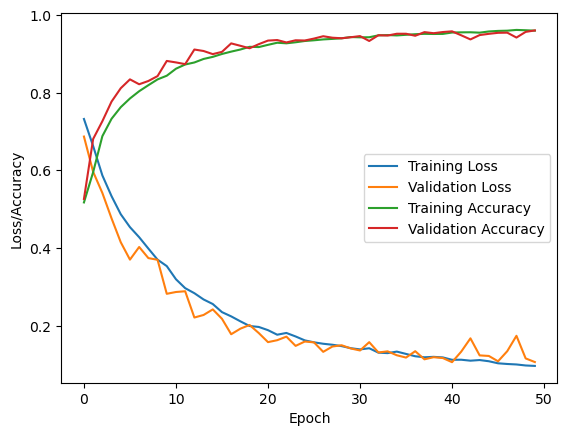

In [ ]:
# Plot training/validation curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

2/2 [==============================] - 0s 252ms/step


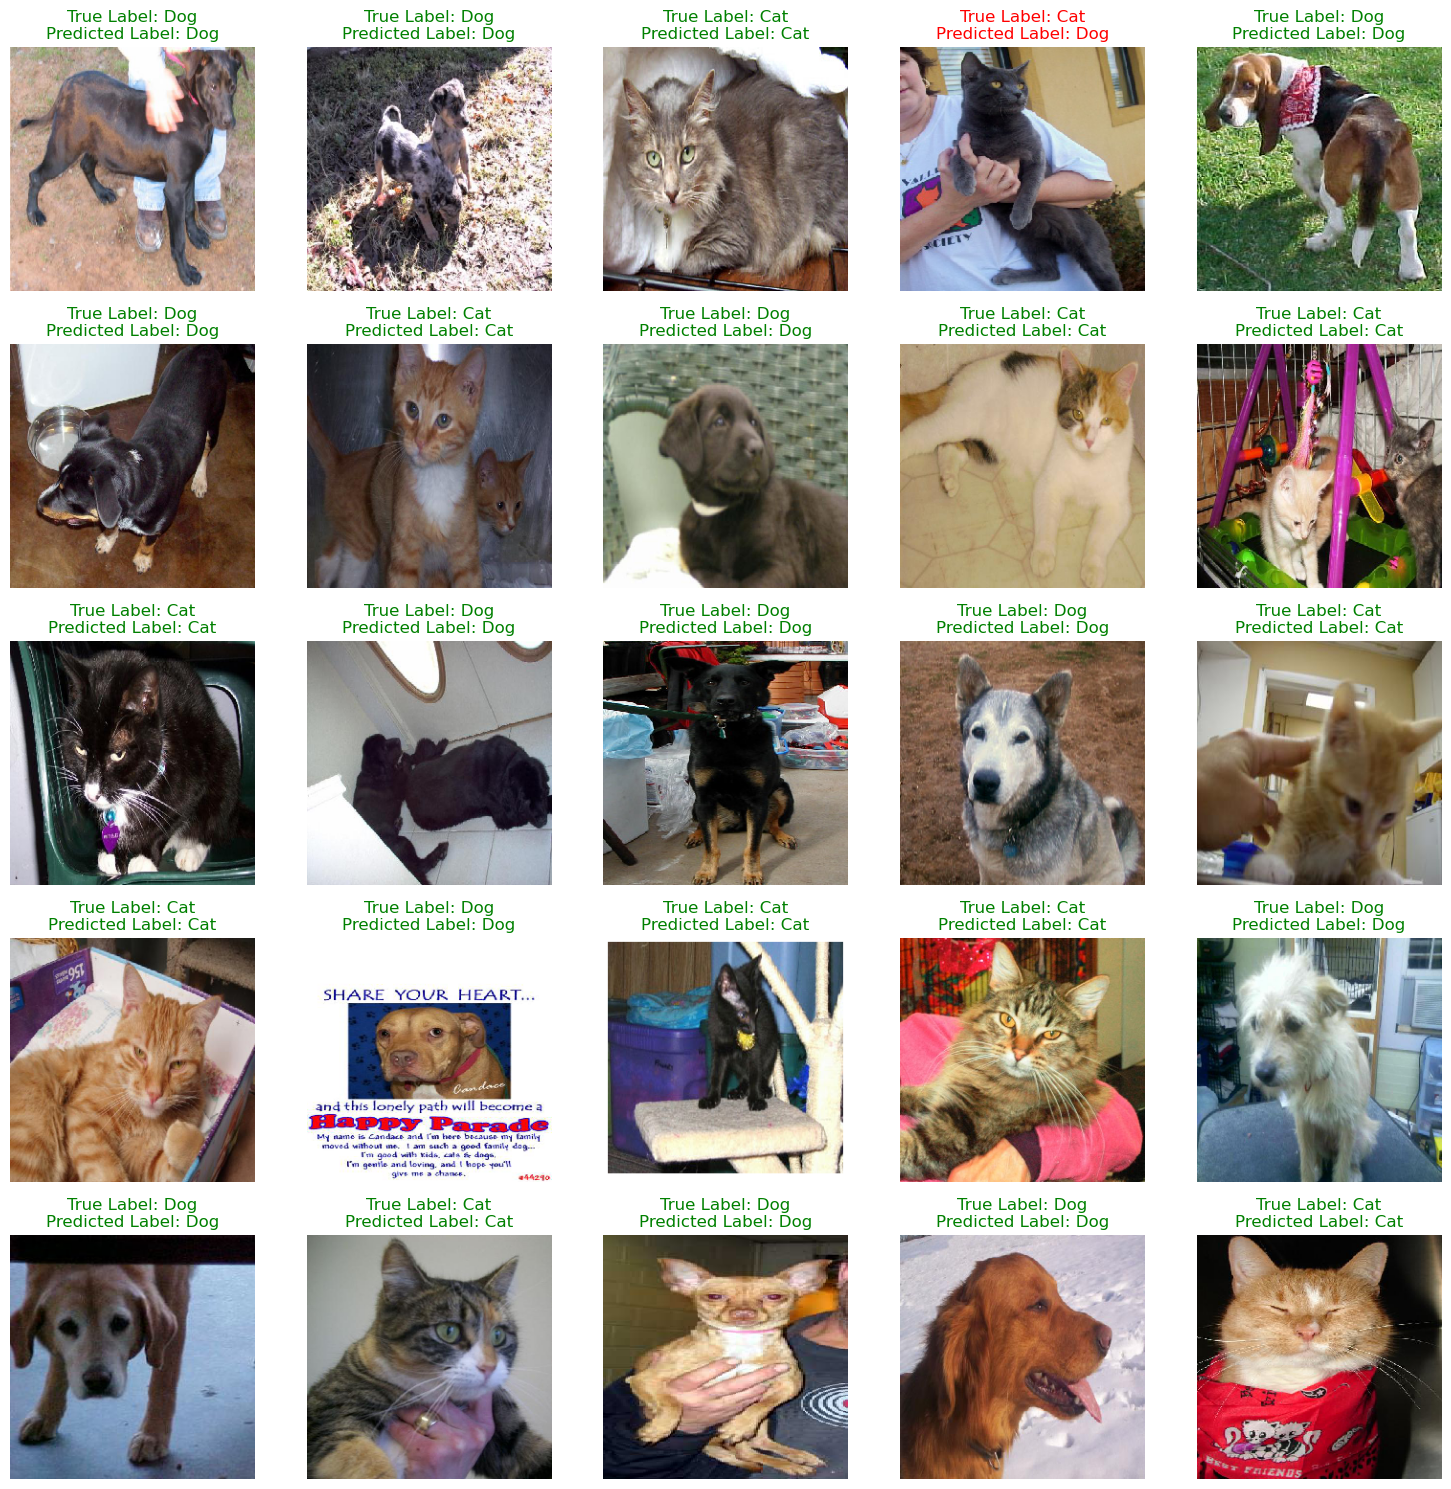

Accuracy: 0.96875


In [ ]:
# Call the function to display 25 images from the testing set
display_images_with_labels(test_generator, model, 25, 5, 5)


Found 20 images belonging to 2 classes.


1/1 [==============================] - 8s 8s/step


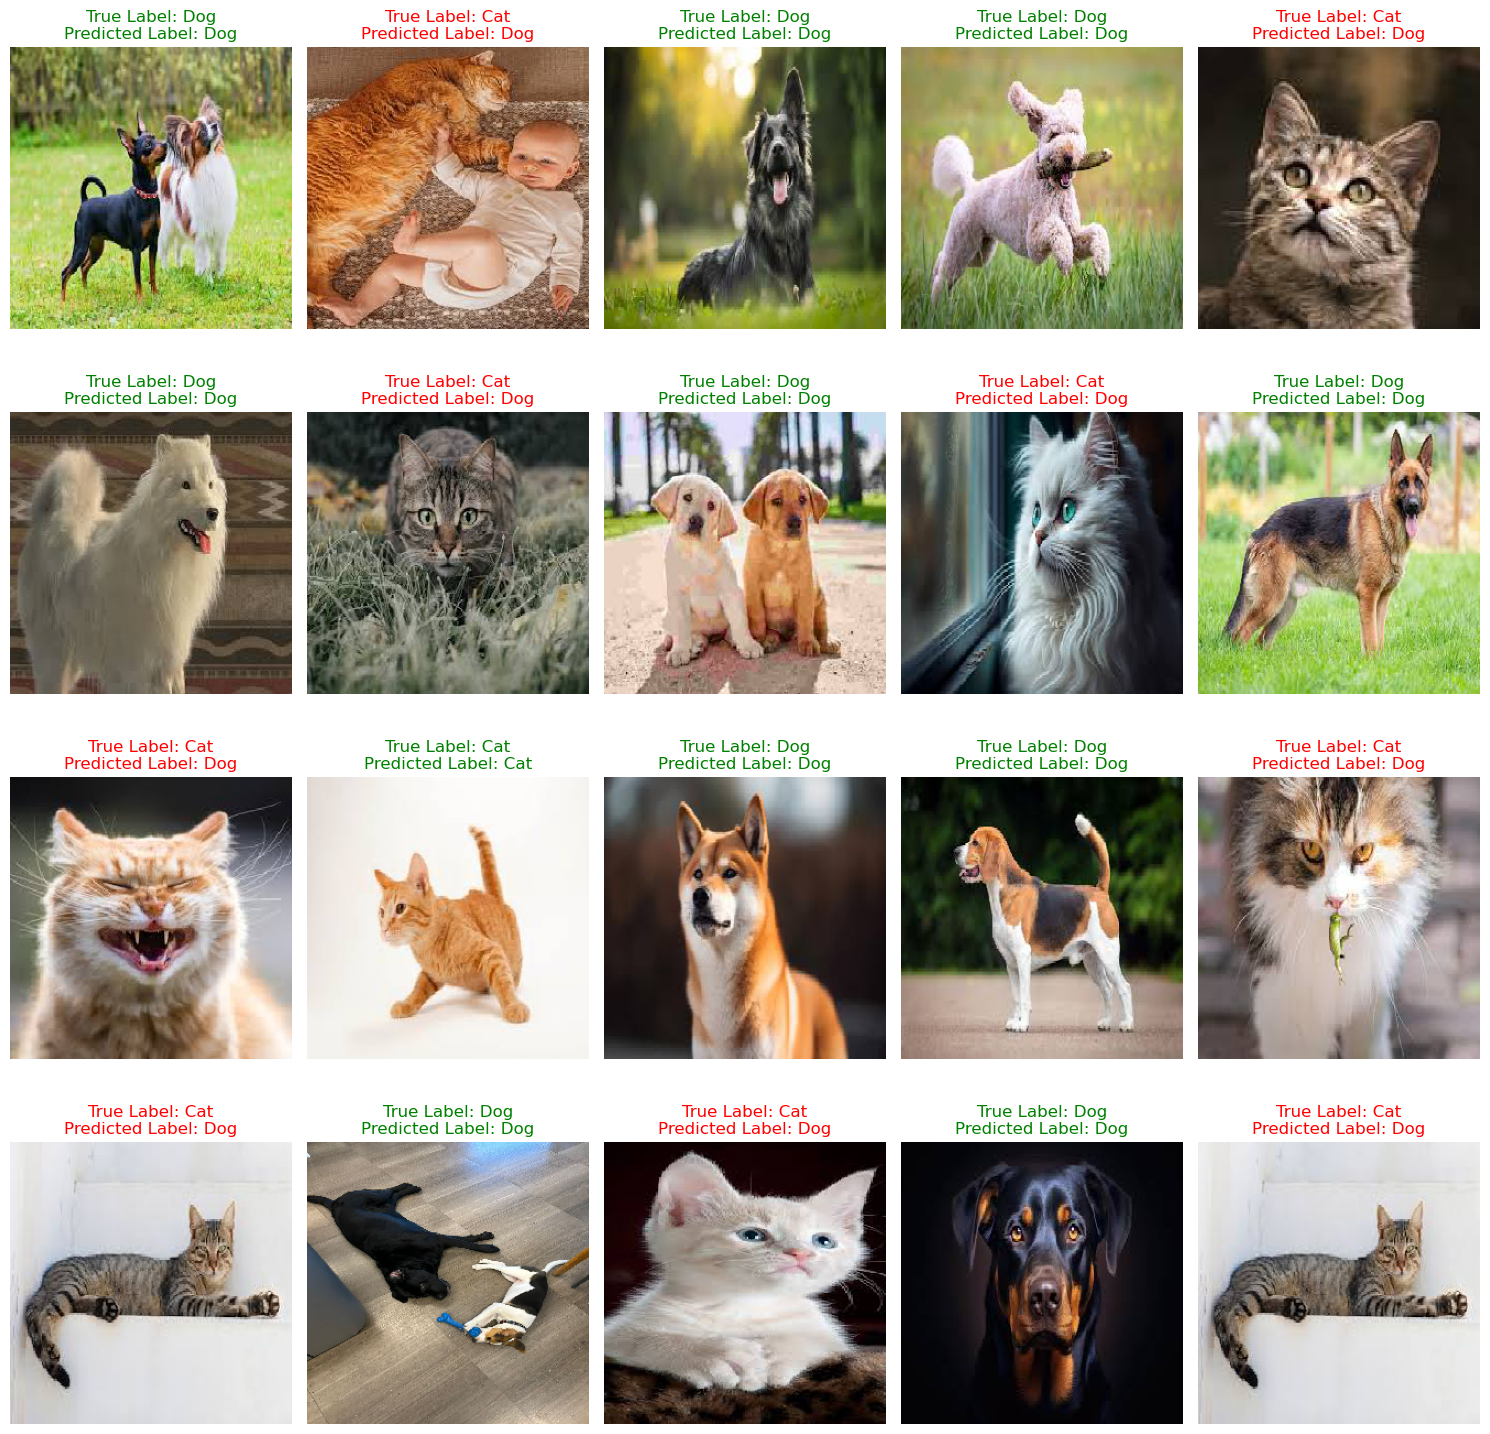

Accuracy: 0.55


In [ ]:
# Load and preprocess the final test data using ImageDataGenerator
validation_data_generator = ImageDataGenerator(rescale=1./255)
validation_set = validation_data_generator.flow_from_directory(
        'outer_dataset/',
        target_size=(256, 256),
        batch_size=64,
        class_mode='categorical',
        shuffle=True)

display_images_with_labels(validation_set, model, 20, 4, 5)


In [ ]:
# Load the saved model
loaded_model = load_model('best_model3.keras')

print("Our best model:")
loaded_model.summary()

Our best model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30,

In [ ]:
# Evaluate the model
loaded_loss, loaded_accuracy = loaded_model.evaluate(test_generator)
print("Evaluation Results for the Loaded Model:")
print("=========================================")
print(f"Test Loss: {loaded_loss}")
print(f"Test Accuracy: {loaded_accuracy}")


79/79 [==============================] - 9s 101ms/step - loss: 0.1742 - accuracy: 0.9420
Evaluation Results for the Loaded Model:
Test Loss: 0.17416541278362274
Test Accuracy: 0.9419884085655212


1/1 [==============================] - 0s 24ms/step


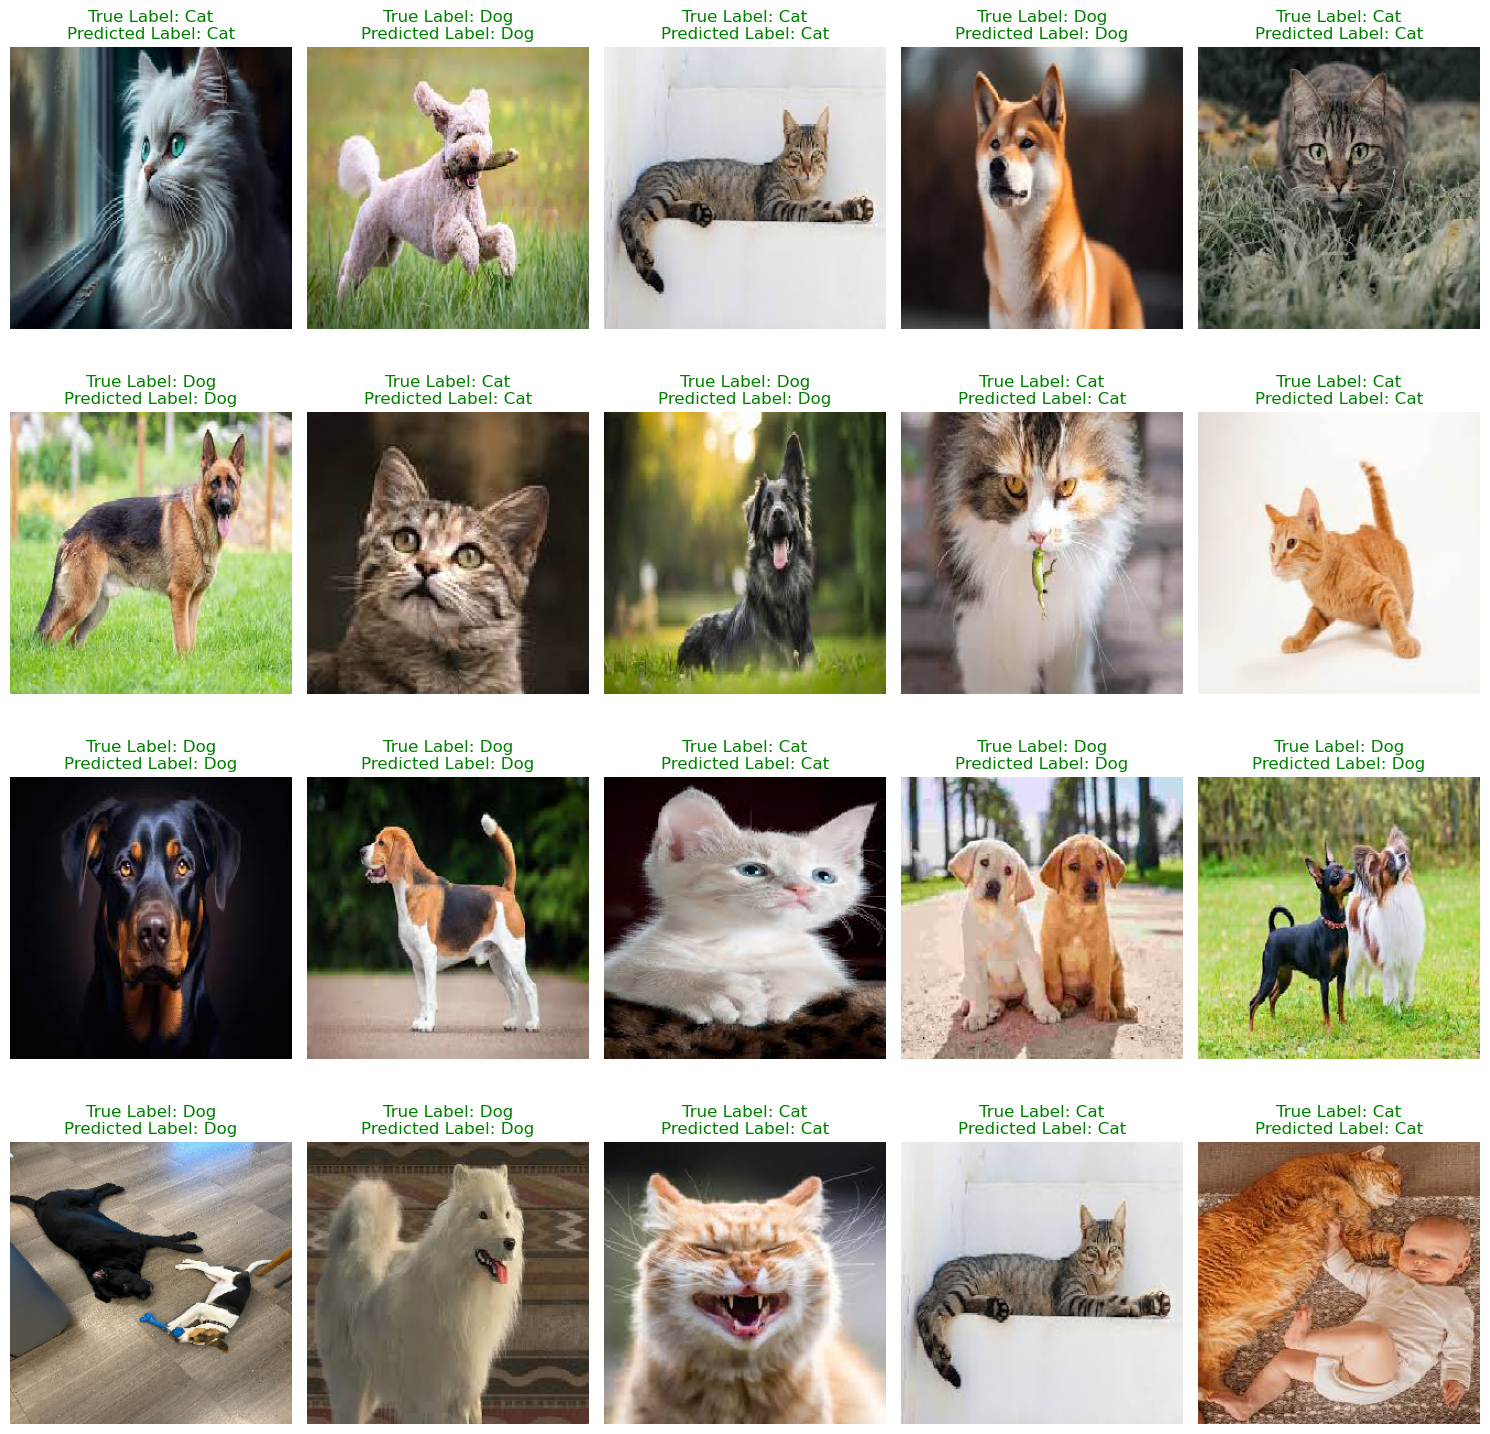

Accuracy: 1.0


In [ ]:

display_images_with_labels(validation_set, loaded_model, 20, 4, 5)